In [103]:
# We are importing data from text file and seperating it on the basis of the TABS
import pandas as pd
data = pd.read_csv("wildfires.txt", sep="\t")
print(data)

       fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0     no     2015    28        59       0.0          8.06           3.47    1   
1     no     2010    30        61       1.3          8.17           4.03    2   
2     no     2009    26        83      13.1          8.08           3.59    3   
3     no     2017    25        87       2.5          7.18           2.42    4   
4     no     2014    28        77       0.0         14.98           4.63    5   
..      ...   ...   ...       ...       ...           ...            ...  ...   
199  yes     2017    31        67       0.0         45.15          17.89   26   
200   no     2017    29        89       4.4          8.74           6.52   27   
201   no     2009    27        88       0.5          8.87           3.71   28   
202   no     2016    25        56       0.1         15.54           6.10   29   
203  no      2012    24        62       0.2         16.72           5.75   30   

     month  wind_speed  
0 

In [145]:
# Exploring data for data types and checking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fire           204 non-null    object 
 1   year           204 non-null    int64  
 2   temp           204 non-null    int64  
 3   humidity       204 non-null    int64  
 4   rainfall       204 non-null    float64
 5   drought_code   204 non-null    float64
 6   buildup_index  204 non-null    float64
 7   day            204 non-null    int64  
 8   month          204 non-null    int64  
 9   wind_speed     204 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 16.1+ KB


/var/folders/_7/g0742nl90ksgmxsjw9jc5wvw0000gn/T/ipykernel_2714/1130034934.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr());


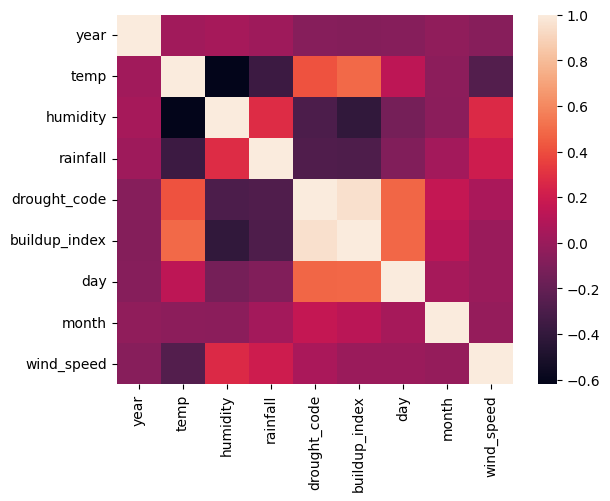

In [147]:
# Checking correlation between different Independent Features.
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr());
plt.show()

In [104]:
# Dropping features that might not have great impact on our dependent variables and negatively affect our Algoithm due to Over-fitting
del data["year"]
del data["day"]
del data["month"]

In [105]:
# Seperating dependent and independent variables.
dependent = data.values[:,0]
independent = data.values[:,1:9]

In [106]:
# We are witnessing a lot of extra white-spaces in out dependent variables of type object. This may make our model unnecessarily sensetive. We try to remove unnecessary whitespaces to form a uniform data. 
for var in range(len(dependent)):
    dependent[var] = dependent[var].replace(" ", "")
print(dependent)

['no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'no' 'yes' 'no' 'no' 'no' 'no' 'yes' 'yes' 'no' 'yes' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'no' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'no'
 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes'
 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'yes'
 'yes' 'yes' 'yes' 'no' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'no' 'yes'
 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'no' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'no' 'no'

In [107]:
# To calculate the dimension of error in our model, we try to encode dependent variables to numbers. Here we are mapping "no" to 0 and "yes" to 1
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dependent = le.fit_transform(dependent)
dependent

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0])

In [108]:
# We randomly split the data to 70% of test data and 30% of train data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    independent, dependent, test_size=0.3, random_state=0)

In [109]:
# Importing Accuracy and performance measurement libraries
from sklearn.metrics import accuracy_score
from sklearn import metrics
import numpy as np

In [110]:
### Defining Multi-Layer Percepptron Algorithm
## 2-Hidden-layer Perceptron

In [111]:
## Defining required variables.
# Learning rate is the rate or dimention using which we adjust our weights in case of error. We start from 0.1 using brute-fore method and onclude 0.0001 to be the optimal learning rate
# Bias is a numerical term added to to the input to increase model accuracy. In linear model y=mx+b bias is the constant "b". We set bias as 1 and will be adjusting bias through weights as anyting multiplied by 1 is eqal to that number.
# We calculate number of features for helping in future calculations.
learningRate = 0.0001
bias = 1
feature_length = len(independent[0])

In [112]:
### This is where we initilize all the weights. We start by initilizing weights by random numbers using an inbuilt function "random". Since weights will be accessed and updated by other functions and different parts of the algorithm, we keep them in the global scope. We define 3 different sets of weights.
## Weights between Input Features and First Hidden Layer (weight_layer1).
# A 2-Dimention list consisting of different weights with a shape of (feature_length + 1) X (feature_length + 1). We are adding 1 more row for the bias. Structure: [[Weigtht betwwen 1st input and 1st node of 1st hidden layer, Weigtht betwwen 2nd input and 1st node of 1st hidden layer, ..., Weigtht betwwen nth input and 1st node of 1st hidden layer], [Weigtht betwwen 1st input and 2nd node of 1st hidden layer, ....],..[]]
## Weights between First Hidden Layer and Second Hidden Layer (weight_layer2).
# A 2-Dimention list consisting of different weights with a shape of (feature_length + 1) X (feature_length + 1). We are adding 1 more row for the bias. Structure: [[Weigtht betwwen 1st node of 1st hidden layer and 1st node of 2nd hidden layer, Weigtht betwwen 2nd node of 1st hidden layer and 1st node of 2nd hidden layer, ..., Weigtht betwwen nth node of 1st hidden layer and 1st node of 2nd hidden layer], [Weigtht betwwen 1st node of 1st hidden layer and 2nd node of 2nd hidden layer, ....],..[]]
## Weight betwwen Second Hidden Layer and Final Output (weight_final).
# A 1-Dimention List consisting of different weights with a shape of (feature_length + 1) X 1. We are adding 1 more row for the bias. Structure: [Weigtht betwwen 1st node of 2nd hidden layer and Final Output, Weigtht betwwen 2nd node of 2nd hidden layer and Final Output,..., Weigtht betwwen nth node of 2nd hidden layer and Final Output]

import random

# Inital Weights
weight_layer1 = [[random.random() for i in range (feature_length + 1)] for j in range (feature_length + 1)]
weight_layer2 = [[random.random() for i in range (feature_length + 1)] for j in range (feature_length + 1)]
weight_final = [random.random() for i in range (feature_length + 1)]

In [113]:
# Hidden layers, value
hx1 = []
hx2 = []

In [114]:
# This is the calculation for 1st hidden layer. This function accepts tha argument of input features, data type: 1-d list. it calculates the values for each node in 1st hidden layer by summation of product of input and it's coresponding weights of the coresponding layer. Hence 2 for loops to claculate for each layer. With 1st for loop we iterate throught the length weight_layer1 which will be the length (or number of nodes) of our first hidden layer. Then we iterate it again on the length of each tupple in the weighted_layer1 and calculate the value of each node. Post calculation we push/update the value to hidden layers defined as hx1.
def hidden_Calculation1(input):
    for i in range(len(weight_layer1)):
        xi = 0
        for j in range(len(input)):
            xi += input[j] * weight_layer1[i][j]
        if (len(hx1) < len(input)):
            hx1.append(xi)
        else:
            hx1[i] = xi

In [115]:
# This is the calculation for 2nd hidden layer. This function calculates the values for each node in 2nd hidden layer using nodes of 1st hidden layer by summation of product of nodes of first layer and it's coresponding weights of the coresponding layer. Hence 2 for loops to claculate for each layer. With 2nd for loop we iterate throught the length weight_layer2 which will be the length (or number of nodes) of our second hidden layer. Then we iterate it again on the length of each tupple in the weighted_layer2 and calculate the value of each node. Post calculation we push/update the value to hidden layers defined as hx2.
def hidden_Calculation2():
    for i in range(len(weight_layer2)):
        xi = 0
        for j in range(len(hx1)):
            xi += hx1[j] * weight_layer2[i][j]
        if (len(hx2) < len(hx1)):
            hx2.append(xi)
        else:
            hx2[i] = xi

In [116]:
# This is the calculation for final value from the second layer by summation of product of nodes of first layer and it's coresponding weights in weight_final.
def y_Calculation():
    xi = 0
    for i in range(len(weight_final)):
        xi += hx2[i] * weight_final[i]
    return xi

In [117]:
# This function is based out of ReLU (Rectified Linear Unit) activation function. Based on the outpu of y from the Multi-Layer Perceptron it checks if the value is over 0 or not. In case the condition is True it returns 1 else 0.
def guess_value(y_val):
    if y_val > 0:
        return 1
    else:
        return 0

In [118]:
# This is the back-propagation function. this function accepts the argument of error (Ranging between -1 and 1) and a list containing last inputs which generated the error. We update the weights in each layer bu summation of its last value to the product of learning rate, error and last coresponding input.
def backpropagation(error, inputs):
    for i in range(len(weight_layer1)):
        for j in range(feature_length):
            weight_layer1[i][j] += learningRate * error * inputs[j]
    for i in range(len(weight_layer2)):
        for j in range(len(hx1)):
            weight_layer2[i][j] += learningRate * error * hx1[j]
    for i in range(len(weight_final)):
        weight_final[i] += learningRate * error * hx2[i]

In [119]:
# This is the parent function for training the model. This function takes each row of independent features and it's coresponding desired value of dependent features as the arguments. In the first 2 lines of the function, it adds bias to the input features. Next 4 lines are used for training by calculating the values to each layers. These set of instructions could colectively also be refered as feed forward calculations. Then we calculate the deviation in recieved output from the expected output. In case there is a deviation i.e., error != 0 we call the back propagation function to adjust the weights accordingly.
def train(train_inputs, desired):
    train_inputs = np.array(train_inputs)
    train_inputs = np.append(train_inputs,bias)
    hidden_Calculation1(train_inputs)
    hidden_Calculation2()
    y = y_Calculation()
    guess = guess_value(y)
    error = desired - guess
    if error != 0:
        backpropagation(error, train_inputs)

In [120]:
# Once the model is trained, we use this function to test the model for predecting the dependent variables. This function takes the argument of each row of independent features. This function also adds the bias to the set of input and returns the value from feed forward calculation.
def test(test_inputs):
    test_inputs = np.array(test_inputs)
    test_inputs = np.append(test_inputs,bias)
    hidden_Calculation1(test_inputs)
    hidden_Calculation2()
    y = y_Calculation()
    guess = guess_value(y)
    return guess

In [121]:
# K-fold Train-Validation.
# This block iterates throught the train set 5 times and divide the train dataset into 5 blocks, with each iteration containing 1 block as a validation set and remainder of stack as a training set, and it trains the training stack and validates it against validation set. In each iteration we change the validation set to next block and readjusts the tarin set with all of the remainder dataset.
accuracies = []
target_names= ["no", "yes"]
test_len= len(X_test)
for i in range(5):
    print(i+1)
    print("i*round(test_len/5)", i*round(test_len/5), "(i*round(test_len/5))+ round(test_len/5)", (i*round(test_len/5))+ round(test_len/5))
    result=[]
    X_val = X_train[i*round(test_len/5):(i*round(test_len/5))+ round(test_len/5),:]
    
    X_train_stack = X_train
    X_train_stack = np.delete(X_train_stack,list(range(i*round(test_len/5),(i*round(test_len/5))+ round(test_len/5))), axis=0)

    
    y_val = y_train[i*round(test_len/5):(i*round(test_len/5))+ round(test_len/5)]
    
    y_train_stack = y_train
    y_train_stack= np.delete(y_train_stack,list(range(i*round(test_len/5),(i*round(test_len/5)+ round(test_len/5)))))
    

    print("X_train_stack", len(X_train_stack))
    for key in range(len(X_train_stack)):
        train(X_train_stack[key], y_train_stack[key])
    for key in range(len(X_val)):
        result.append(test(X_val[key]))
    print(result)
    accuracy = accuracy_score(y_val, result)
    accuracies.append(accuracy)
    classification_report = metrics.classification_report(y_val, result, target_names=target_names)
    print("Accuracy: ", accuracy)
    print("Classification Report: ")
    print(classification_report)
    print("-------------------")

1
i*round(test_len/5) 0 (i*round(test_len/5))+ round(test_len/5) 12
X_train_stack 130
[0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0]
Accuracy:  0.8333333333333334
Classification Report: 
              precision    recall  f1-score   support

          no       0.71      1.00      0.83         5
         yes       1.00      0.71      0.83         7

    accuracy                           0.83        12
   macro avg       0.86      0.86      0.83        12
weighted avg       0.88      0.83      0.83        12

-------------------
2
i*round(test_len/5) 12 (i*round(test_len/5))+ round(test_len/5) 24
X_train_stack 130
[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
Accuracy:  0.5833333333333334
Classification Report: 
              precision    recall  f1-score   support

          no       0.44      1.00      0.62         4
         yes       1.00      0.38      0.55         8

    accuracy                           0.58        12
   macro avg       0.72      0.69      0.58        12
weighted avg       0.81   

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [122]:
# Once the model has been tested and validated against train dataset, we test the model on a test dataset (created using test-train split as a part of preprocessing) which model has never seen before.
results = []
target_names= ["no", "yes"]
for key in range(len(X_test)):
        result = test(X_test[key])
        results.append(result)
accuracy = accuracy_score(y_test, results)
print("accuracy", accuracy)
classification_report = metrics.classification_report(y_test, results, target_names=target_names)
print("classification_report")
print(classification_report)

accuracy 0.8548387096774194
classification_report
              precision    recall  f1-score   support

          no       0.80      0.89      0.84        27
         yes       0.91      0.83      0.87        35

    accuracy                           0.85        62
   macro avg       0.85      0.86      0.85        62
weighted avg       0.86      0.85      0.86        62



In [148]:
# Once we have the predicted output and actual results, we merge them to form 1 data frame and use the dataframe.to_csv function to output the result.
res_df = pd.DataFrame(list(zip(y_test,results )),columns=['Actual', "Predicted"])
res_df.to_csv("perceptron-multi.csv")

In [123]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

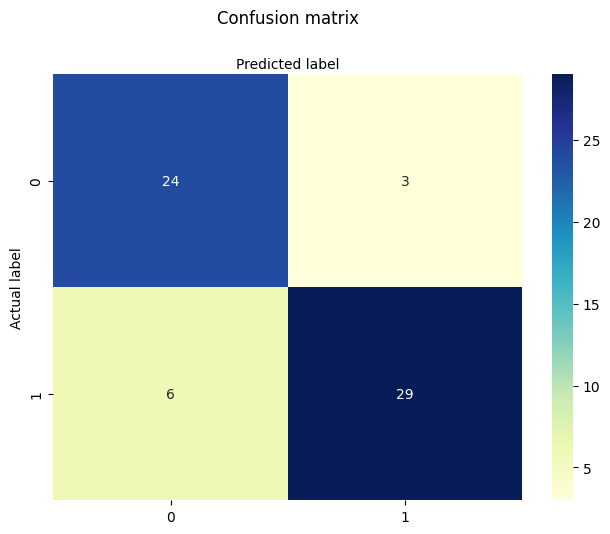

In [124]:
# Plot: Confusion matrix of the predicted label from the trained model.
cnf_matrix = metrics.confusion_matrix(y_test, results)
fig, ax = plt.subplots()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names)
plt.yticks(tick_marks, target_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

AUC: 0.859


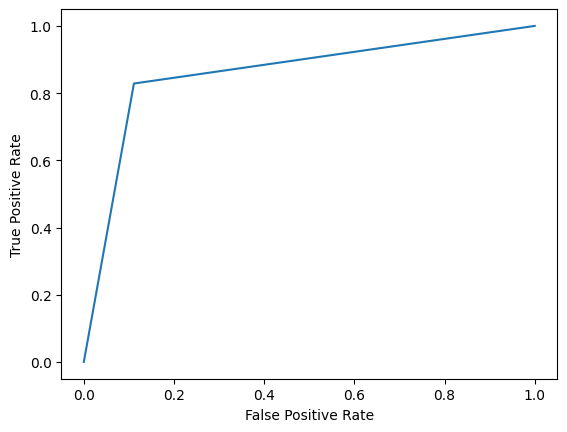

In [125]:
# Plot: ROC Curve of the predicted label from the trained model.
fpr, tpr, _ = metrics.roc_curve(y_test,  results)
# calculate AUC
auc = metrics.roc_auc_score(y_test, results)
print('AUC: %.3f' % auc)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

/opt/homebrew/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


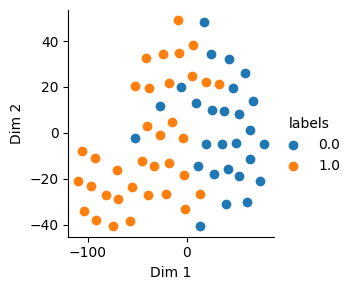

In [126]:
# To plot a scatter of data with 6 features in a 2-d plot is difficult. To overcome that we use TSNE to process our dataset int 2 variables.
# Plot: Scatter Plot of actual data distribution
model = TSNE(n_components = 2, random_state=2)
tsne_data_test = model.fit_transform(X_test)
tsne_data_test = np.vstack((tsne_data_test.T, y_test)).T

tsne_df_test = pd.DataFrame(data=tsne_data_test, columns=("Dim 1", "Dim 2", "labels"))

sns.FacetGrid(tsne_df_test, hue="labels").map(plt.scatter, "Dim 1", "Dim 2").add_legend()
plt.show()

/opt/homebrew/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


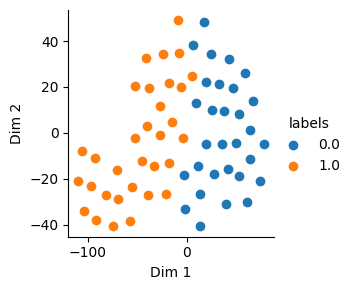

In [127]:
# Plot: Scatter Plot of predicted data distribution
tsne_data_result = model.fit_transform(X_test)
tsne_data_result = np.vstack((tsne_data_result.T, results)).T

tsne_df_result = pd.DataFrame(data=tsne_data_result, columns=("Dim 1", "Dim 2", "labels"))

sns.FacetGrid(tsne_df_result, hue="labels").map(plt.scatter, "Dim 1", "Dim 2").add_legend()
plt.show()

In [ ]:
### Comparison with existing model

In [135]:
## Single iteration - No Validation
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(hidden_layer_sizes=len(independent[0]), max_iter=5, activation="relu")
classifier.fit(X_train, y_train)

classifier_predictions = classifier.predict(X_test)
classifier_accuracy = accuracy_score(y_test, classifier_predictions)
print("accuracy", classifier_accuracy)
classification_report = metrics.classification_report(y_test, classifier_predictions, target_names=target_names)
print("classification_report")
print(classification_report)

accuracy 0.2903225806451613
classification_report
              precision    recall  f1-score   support

          no       0.10      0.07      0.08        27
         yes       0.39      0.46      0.42        35

    accuracy                           0.29        62
   macro avg       0.24      0.27      0.25        62
weighted avg       0.26      0.29      0.27        62



/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


In [143]:
## 5 iteration - 5 Validation
classifier_multi = MLPClassifier(hidden_layer_sizes=len(independent[0]), max_iter=5, activation="relu")

for i in range(5):
    print(i+1)
    print("i*round(test_len/5)", i*round(test_len/5), "(i*round(test_len/5))+ round(test_len/5)", (i*round(test_len/5))+ round(test_len/5))
    X_val = X_train[i*round(test_len/5):(i*round(test_len/5))+ round(test_len/5),:]
    
    X_train_stack = X_train
    X_train_stack = np.delete(X_train_stack,list(range(i*round(test_len/5),(i*round(test_len/5))+ round(test_len/5))), axis=0)

    
    y_val = y_train[i*round(test_len/5):(i*round(test_len/5))+ round(test_len/5)]
    
    y_train_stack = y_train
    y_train_stack= np.delete(y_train_stack,list(range(i*round(test_len/5),(i*round(test_len/5)+ round(test_len/5)))))
    

    print("X_train_stack", len(X_train_stack))
    classifier_multi.fit(X_train_stack, y_train_stack)
    result = classifier_multi.predict(X_val)
    print(result)
    accuracy = accuracy_score(y_val, result)
    accuracies.append(accuracy)
    classification_report = metrics.classification_report(y_val, result, target_names=target_names, zero_division = 0)
    print("Accuracy: ", accuracy)
    print("Classification Report: ")
    print(classification_report)
    print("-------------------")

1
i*round(test_len/5) 0 (i*round(test_len/5))+ round(test_len/5) 12
X_train_stack 130
[0 0 0 1 0 1 1 0 0 0 0 0]
Accuracy:  0.6666666666666666
Classification Report: 
              precision    recall  f1-score   support

          no       0.56      1.00      0.71         5
         yes       1.00      0.43      0.60         7

    accuracy                           0.67        12
   macro avg       0.78      0.71      0.66        12
weighted avg       0.81      0.67      0.65        12

-------------------
2
i*round(test_len/5) 12 (i*round(test_len/5))+ round(test_len/5) 24
X_train_stack 130
[1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy:  0.6666666666666666
Classification Report: 
              precision    recall  f1-score   support

          no       0.00      0.00      0.00         4
         yes       0.67      1.00      0.80         8

    accuracy                           0.67        12
   macro avg       0.33      0.50      0.40        12
weighted avg       0.44      0.67      0.53     

/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_pe

In [144]:
classifier_multi_predictions = classifier.predict(X_test)
classifier_multi_accuracy = accuracy_score(y_test, classifier_multi_predictions)
print("accuracy", classifier_multi_accuracy)
classification_report = metrics.classification_report(y_test, classifier_multi_predictions, target_names=target_names, zero_division = 0)
print("classification_report")
print(classification_report)

accuracy 0.2903225806451613
classification_report
              precision    recall  f1-score   support

          no       0.10      0.07      0.08        27
         yes       0.39      0.46      0.42        35

    accuracy                           0.29        62
   macro avg       0.24      0.27      0.25        62
weighted avg       0.26      0.29      0.27        62

